<a href="https://colab.research.google.com/github/claracbucar/project--4/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Bootcamp - Project 4
Team Members:
* Ben Calderaio
* Conrad Urffer
* Clara Bucar
* Tammy Lacher
* Jeff Pinegar

Due Date: March 22, 2023

---
# Data Cleaning
This program is used to Extract, Transform and Load our data.  Seperate files will then load this data and perform model fitting.

### Imports

In [ ]:
# imports
import sqlalchemy
import psycopg2
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


---
# Extract
Pull raw data from the prostgres database where the CSV file was loaded.

In [203]:
uploaded = files.upload()

Saving df_clean.csv to df_clean.csv


In [204]:
# Read in the postgres table into a dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['df_clean.csv']))
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DOC_COUNT
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2,2,-1134,0,0,0,0,0,1,1
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,-828,0,0,0,0,0,0,1
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,-815,0,0,0,0,0,0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2,0,-617,0,0,0,0,0,0,1
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,-1106,0,0,0,0,0,0,1


In [205]:
df.describe(include = 'all').round(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DOC_COUNT
count,307505.000,307505,307505,307505,307505,307505.000,3.075050e+05,307505.000,307505.000,307505.000,...,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,278232,202447,202920,213306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.081,NaN,NaN,NaN,NaN,0.416,1.687967e+05,599028.395,27107.580,537914.488,...,1.401,0.100,-962.859,0.006,0.006,0.030,0.231,0.230,1.643,0.930
std,0.272,NaN,NaN,NaN,NaN,0.715,2.371248e+05,402493.887,14494.547,369633.198,...,2.377,0.362,826.814,0.078,0.103,0.191,0.857,0.744,1.856,0.344
min,0.000,NaN,NaN,NaN,NaN,0.000,2.565000e+04,45000.000,0.000,0.000,...,0.000,0.000,-4292.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,NaN,NaN,NaN,NaN,0.000,1.125000e+05,270000.000,16524.000,238500.000,...,0.000,0.000,-1570.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,0.000,NaN,NaN,NaN,NaN,0.000,1.471500e+05,513531.000,24903.000,450000.000,...,0.000,0.000,-757.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
75%,0.000,NaN,NaN,NaN,NaN,1.000,2.025000e+05,808650.000,34596.000,679500.000,...,2.000,0.000,-274.000,0.000,0.000,0.000,0.000,0.000,3.000,1.000


Perform PCA and KMeans clustering

In [228]:
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Remove non-numeric columns

array([[<Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>],
       [<Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>],
       [<Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT'}>,
        <Axes:

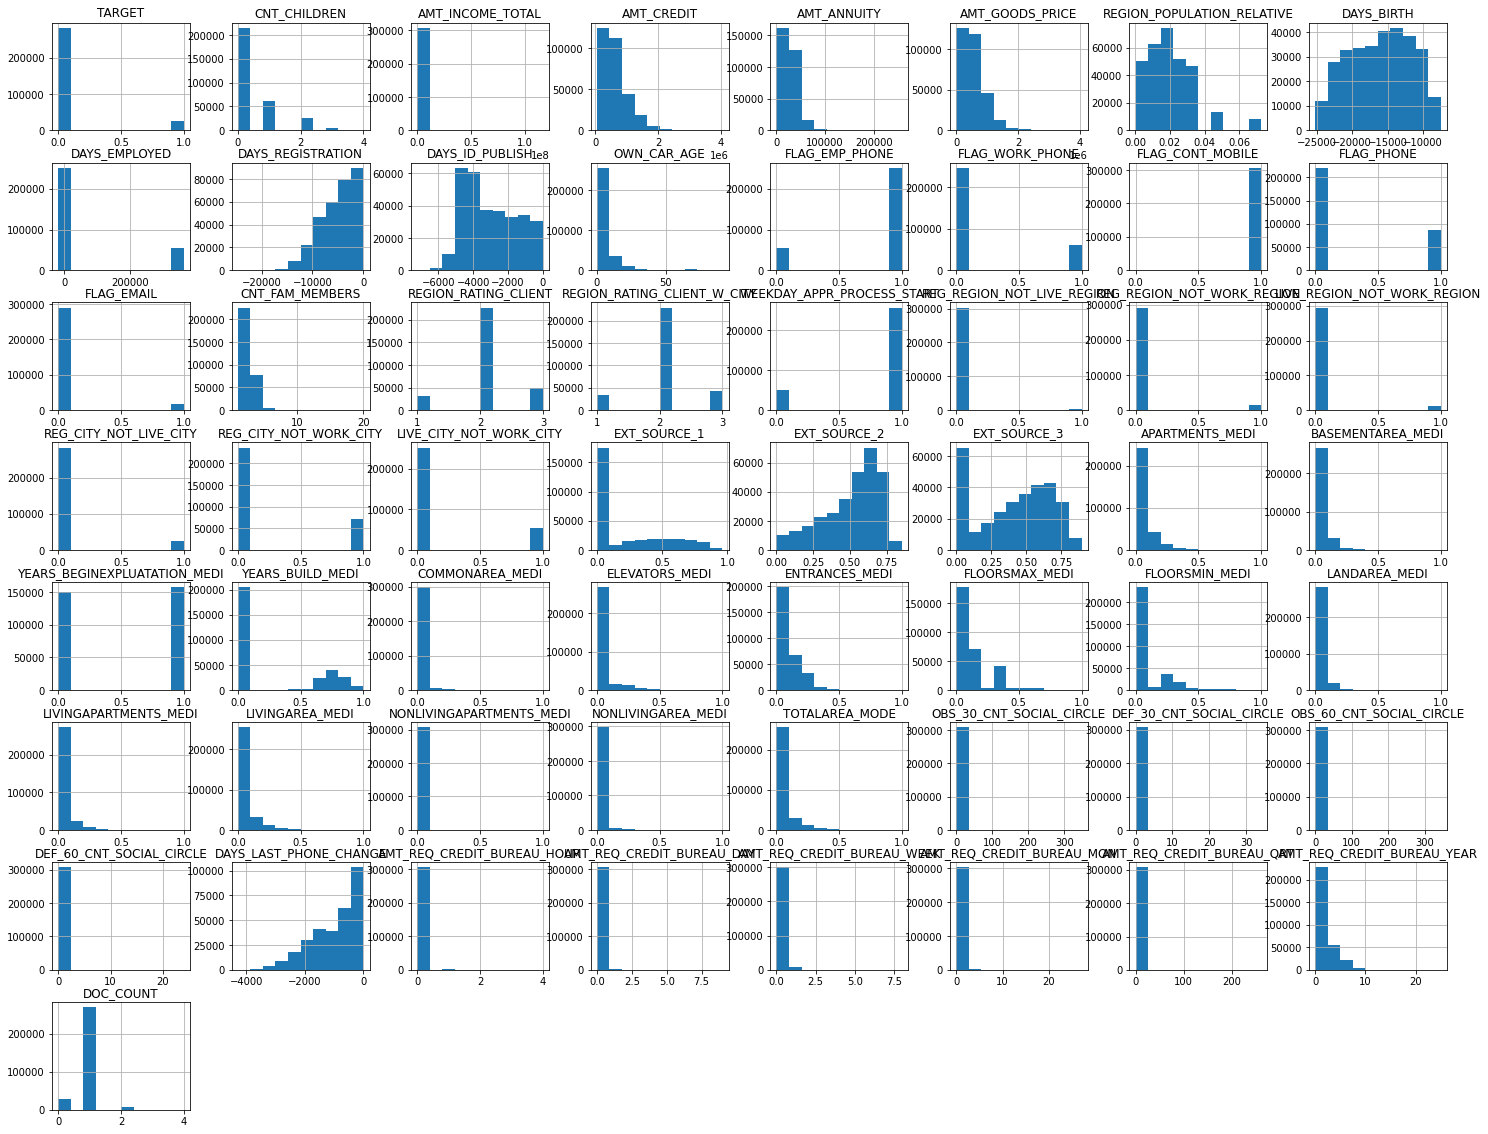

In [250]:
df.hist(bins=10, figsize=(25, 20))

In [231]:
df_kmeans = pd.get_dummies(df)
df_kmeans.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,1,0,0


In [232]:
# Seperate out the dependent and independen variables
# Split our preprocessed data into our features and target arrays
# this is the target
y = df_kmeans["TARGET"].values
# Drop y out of the dataframe to get the independent variables
# this is the feature list
X_dummies = df_kmeans.drop("TARGET", axis=1)
independent_variables = X_dummies.columns
variables = df_kmeans.columns.tolist()
X_dummies.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0,1,0,0,1,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,1,0,0,0,0,0,0,0,1,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,0,1,0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,0,1,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,0,1,0,0


In [235]:
# Split the preprocessed data into a training and testing dataset
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.5, stratify=y, random_state=0)

In [236]:
# there was only one value that needed Scaling ASK_AMT
# Therefore I scaled that variable earlier in the code so the whole data set could be exported for testing in other code.
# I Copied the dataframes to the the "standard names" so that "cut and Paste code would work"
X_train_scaled = X_train
X_test_scaled = X_test


In [239]:
# Initialize the K-Means model
model = KMeans(n_clusters=2, random_state=0)

# Fit the model
model.fit(X_train_scaled)

# Predict clusters
predictions = model.predict(X_train_scaled)

# Add the predicted class columns
X_train_scaled["class"] = model.labels_
X_train_scaled.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,class
28141,1,202500.0,450000.0,32746.5,450000.0,0.072508,-15982,-643,-3732.0,-2200,...,0,0,0,0,0,0,1,0,0,0
247655,0,252000.0,1277757.0,54265.5,1084500.0,0.018850,-21936,365243,-8961.0,-4238,...,0,0,0,0,0,0,1,0,0,1
273897,0,85500.0,91692.0,11011.5,81000.0,0.011703,-12350,-839,-6052.0,-2105,...,0,0,0,0,0,0,1,0,0,0
277336,0,270000.0,1236816.0,36292.5,1080000.0,0.046220,-22394,365243,-4027.0,-3961,...,0,0,0,0,0,0,1,0,0,1
217191,1,76500.0,310500.0,15232.5,310500.0,0.028663,-17452,-3966,-4508.0,-1000,...,0,0,0,0,0,0,1,0,0,0


In [240]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_train_scaled)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

,k,inertia
0,1,6.447155e+16
1,2,3.435483e+16
2,3,2.075636e+16
3,4,1.288839e+16
4,5,9.544647e+15


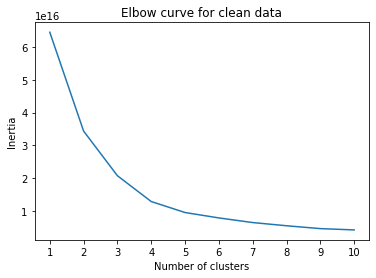

In [241]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for clean data')
plt.show()

In [242]:
 def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [243]:
clusters = get_clusters(2, X_train_scaled) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [244]:
clusters

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,class
28141,1,202500.0,450000.0,32746.5,450000.0,0.072508,-15982,-643,-3732.0,-2200,...,0,0,0,0,0,0,1,0,0,0
247655,0,252000.0,1277757.0,54265.5,1084500.0,0.018850,-21936,365243,-8961.0,-4238,...,0,0,0,0,0,0,1,0,0,1
273897,0,85500.0,91692.0,11011.5,81000.0,0.011703,-12350,-839,-6052.0,-2105,...,0,0,0,0,0,0,1,0,0,0
277336,0,270000.0,1236816.0,36292.5,1080000.0,0.046220,-22394,365243,-4027.0,-3961,...,0,0,0,0,0,0,1,0,0,1
217191,1,76500.0,310500.0,15232.5,310500.0,0.028663,-17452,-3966,-4508.0,-1000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223010,0,202500.0,900000.0,39775.5,900000.0,0.026392,-19757,-5811,-9933.0,-3312,...,0,0,0,0,0,0,1,0,0,1
28756,2,270000.0,528633.0,41040.0,472500.0,0.024610,-12566,-4336,-6658.0,-4277,...,0,0,0,0,0,0,1,0,0,0
303066,1,247500.0,675000.0,28507.5,675000.0,0.018209,-11688,-3862,-11664.0,-2034,...,0,0,0,0,0,0,1,0,0,0
80315,0,90000.0,239850.0,23494.5,225000.0,0.010276,-21553,365243,-11301.0,-4029,...,0,0,0,1,0,0,0,1,0,0


In [248]:
from sklearn.metrics import confusion_matrix, classification_report
# continue the evaluation of the model
y_true = y_test
# Predict  - using the model calculate results for the text data
y_pred = model.predict(X_test_scaled)
# create and evaluate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"True positives (TP): {tp}")
print(f"True negatives (TN): {tn}")
print(f"False positives (FP): {fp}")
print(f"False negatives (FN): {fn}")
precision = tp / (tp + fp)
print(f'precision =  {precision}')
accuracy = (tp + tn)/(tp+tn+fp+fn)
print(f'accuracy =  {accuracy}')
sensitivity = tp / (tp + fn)
print(f'sensitivity =  {sensitivity}')
F1_j = 2*tp/(2*tp+fn+fp)
print(f'F1 = {F1_j}')
print(classification_report(y_true, y_pred))

True positives (TP): 3112
True negatives (TN): 96057
False positives (FP): 45283
False negatives (FN): 9301
precision =  0.06430416365326996
accuracy =  0.6449890408642432
sensitivity =  0.2507049061467816
F1 = 0.102354953295619
              precision    recall  f1-score   support

           0       0.91      0.68      0.78    141340
           1       0.06      0.25      0.10     12413

    accuracy                           0.64    153753
   macro avg       0.49      0.47      0.44    153753
weighted avg       0.84      0.64      0.72    153753

